In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CS150 /Project 2/features.csv')

In [8]:
# Select columns for analysis
category_col = 'IsHoliday'
numeric_cols = ['Temperature', 'Fuel_Price']

# Basic statistics for the full dataset
basic_stats = df[numeric_cols].agg(['mean', 'max', 'min', 'std', 'median'])
basic_stats.loc['range'] = basic_stats.loc['max'] - basic_stats.loc['min']

# Grouped statistics by category column
grouped_stats = df.groupby(category_col)[numeric_cols].agg(['mean', 'max', 'min', 'std', 'median'])

# Compute and insert the range manually for each variable in each group
for col in numeric_cols:
    grouped_stats[(col, 'range')] = grouped_stats[(col, 'max')] - grouped_stats[(col, 'min')]

# Sort columns so 'range' appears at the end of each group
grouped_stats = grouped_stats.sort_index(axis=1, level=0)

print("Overall Statistics:\n", basic_stats)
print("\nGrouped Statistics by 'IsHoliday':\n", grouped_stats)

Overall Statistics:
         Temperature  Fuel_Price
mean      59.356198    3.405992
max      101.950000    4.468000
min       -7.290000    2.472000
std       18.678607    0.431337
median    60.710000    3.513000
range    109.240000    1.996000

Grouped Statistics by 'IsHoliday':
           Fuel_Price                                          Temperature  \
                 max      mean median    min  range       std         max   
IsHoliday                                                                   
False          4.468  3.415351  3.527  2.472  1.996  0.432637      101.95   
True           4.124  3.284323  3.236  2.513  1.611  0.394686       96.22   

                                                      
                mean median   min   range        std  
IsHoliday                                             
False      60.194901  61.77 -7.29  109.24  18.375259  
True       48.453060  46.67  2.32   93.90  19.172883  


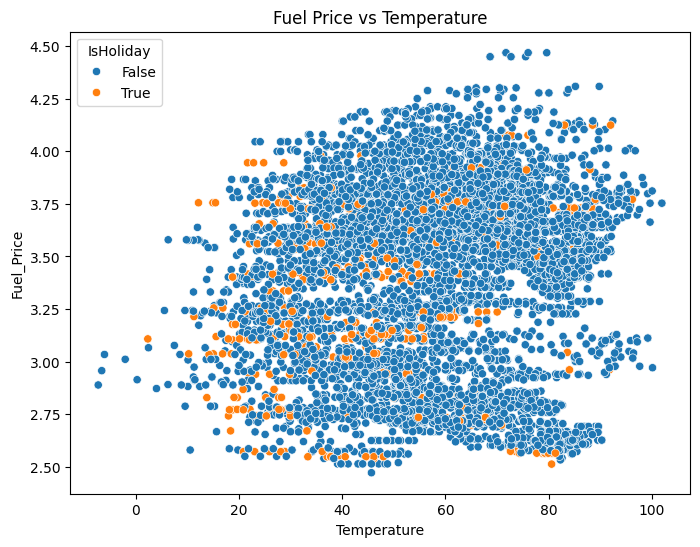

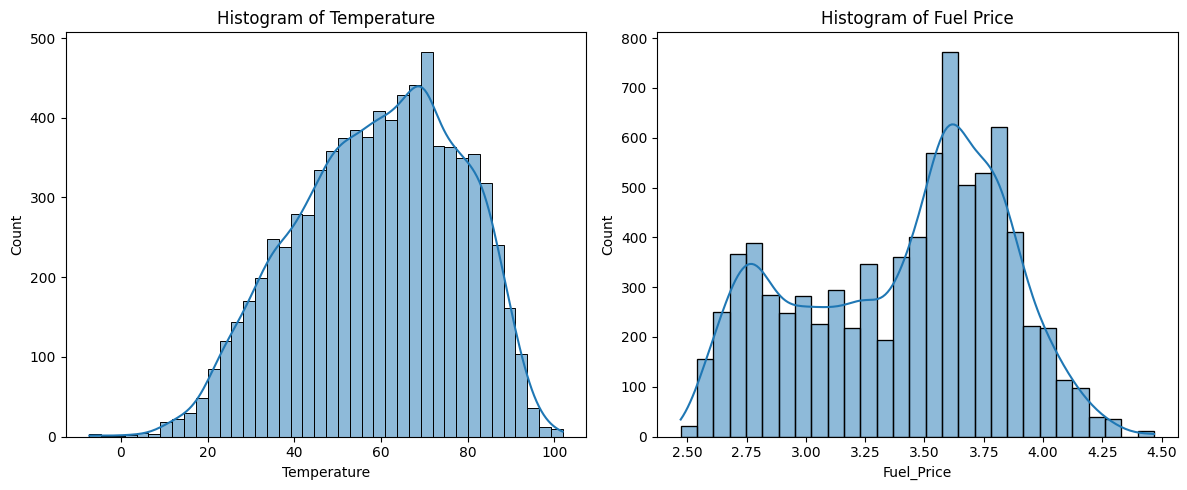

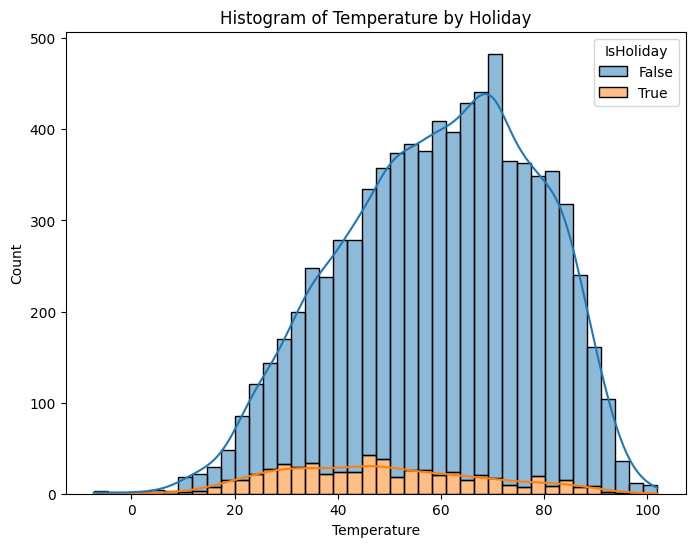

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature', y='Fuel_Price', hue='IsHoliday')
plt.title('Fuel Price vs Temperature')
plt.show()

# Histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Temperature'], kde=True, ax=axs[0])
axs[0].set_title('Histogram of Temperature')
sns.histplot(df['Fuel_Price'], kde=True, ax=axs[1])
axs[1].set_title('Histogram of Fuel Price')
plt.tight_layout()
plt.show()

# Histograms per category
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Temperature', hue='IsHoliday', kde=True, multiple='stack')
plt.title('Histogram of Temperature by Holiday')
plt.show()


For this project, I analyzed a retail dataset that includes weekly information on temperature, fuel price, and whether the week included a major holiday (IsHoliday). My focus was on understanding how temperature and fuel prices fluctuate and whether holidays have any noticeable impact on these metrics. The dataset met all project requirements, with IsHoliday serving as the categorical variable and both Temperature and Fuel_Price as continuous numeric columns.

The summary statistics revealed that holidays tend to be associated with slightly lower average temperatures, which makes sense considering many U.S. holidays fall in colder months. However, the average fuel price was not significantly different between holiday and non-holiday weeks. The scatter plot showed no strong correlation between temperature and fuel price, indicating they likely fluctuate independently. The histograms further confirmed that while temperature had a broad and somewhat bimodal distribution (likely due to seasonal changes), fuel prices followed a more normal distribution with some variability.

Overall, I was a bit surprised to see that holidays did not have a major effect on fuel prices—contrary to the common belief that fuel prices spike during holiday weeks due to travel. A potential follow-up could involve comparing regional fuel prices or examining traffic volume alongside pricing to get a fuller picture. Another interesting dataset to explore could involve sales data from specific departments or stores to evaluate how consumer behavior changes during holiday weeks versus regular weeks.